# Анализ тарифов оператора сотовой связи

## Получение общей информации

Открою каждый датафрейм по отдельности и выведу общую информацию о них.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
tables = ['users', 'tariffs', 'calls', 'messages', 'internet']
for name in tables:
    data = pd.read_csv(f'/datasets/{name}.csv')
    display(data.head())
    data.info()
    display(data.describe())
    globals()[name] = data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Данные о пользователях и их поведении относительно услуг сотовой связи содержатся в пяти таблицах:

**Users** (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя в годах
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (пропущенное значение говорит о том, что тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Calls** (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Messages** (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Internet** (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Tariffs** (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

Так как все датафреймы содержат разную информацию и разное количество строк, объединять таблицы буду только после предобработки данных.

Получена общая информация о каждом датафрейме. Таблицы содержат разное количество строк, пропущенные значения встречаются только в датафрейме `users`. Встречаются следующие типы данных: `int64`, `float64`, `object`. Названия всех столбцов приведены к "змеиному регистру". В датафрейме `internet` есть лишняя колонка `Unnamed: 0`, от которой необходимо избавиться.

## Предобработка данных

После получения общей информации о датафрейме дальнейшая работа с данными заключается в их предобработке, а именно:
- изменение типов данных;
- удаление ненужных столбцов;
- переименование столбцов; 
- обработка пропущенных значений; 
- поиск явных и неявных дубликатов;
- добавление новых столбцов.

### Изменение типов данных

В датафреймах `users`, `calls`, `messages`, `internet` преобразую столбцы с датами к типу datetime:

In [3]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [4]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [6]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [7]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Выполню проверку на то, что дата оттока всегда позже даты регистрации:

In [8]:
len(users.query('churn_date.notna() and churn_date < reg_date'))

0

### Удаление столбцов

В таблице `internet` содержится столбец `Unnamed: 0` c дублирующей информацией о индексах. Это лишняя информация, поэтому я удалю такой столбец с помощью функции pop():

In [9]:
internet.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [10]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Переименование столбцов

Для лучшего понимания и наглядного восприятия, о том что в столбце содержится информация о продолжительности разговора в минутах, дополню название столбца: `duration`:

In [11]:
calls = calls.rename(columns={'duration': 'duration_minutes'})

### Обработка пропущенных значений

Проверю датафреймы на наличие пропущенных значений.

In [12]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В датафрейме `users` есть пропуски только в одном столбце - `churn_date`. Там содержится информация о дате прекращения пользования тарифом, а пропущенные значения говорят о том, что тариф еще действовал на момент выгрузки данных. Поэтому удалять или заменять такие значения не нужно.

In [13]:
calls.isna().sum()

id                  0
call_date           0
duration_minutes    0
user_id             0
dtype: int64

In [14]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [15]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

В трех датафреймах с информацией о звонках, сообщениях и интернет-сессиях пропущенных значений не обнаружено.

### Обработка дубликатов

#### Проверка на наличие явных дубликатов

Проверю датафреймы на наличие явных дубликатов методом duplicated():

In [16]:
users.duplicated().sum()

0

In [17]:
calls.duplicated().sum()

0

In [18]:
messages.duplicated().sum()

0

In [19]:
internet.duplicated().sum()

0

Явных дубликатов не обнаружено.

#### Проверка на наличие неявных дубликатов

Теперь проверю два категориальных столбца `city` и `tariff` из таблицы `users` на наличие неявных дубликатов. Колонки с именем и фамилией также являются строковыми, но их на проверку неявных дубликатов я не рассматриваю.

In [20]:
for column in ['city', 'tariff']:
    print(column, sorted(users[column].unique()), sep=': ', end='\n\n')

city: ['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород', 'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород', 'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск', 'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск', 'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск', 'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец', 'Чита', 'Якутск', 'Ярославль']

tariff: ['smart', 'ultra']



Таким образом, дублирующихся значений в таблицах не оказалось.

### Округление значений в столбцах

Округлю продолжительность звонков `duration_minutes` в таблице `calls` до большего целого значения, так как оператор округляет продолжительность звонка до минут после каждого звонка.

In [21]:
calls['duration_minutes'] = calls['duration_minutes'].apply(np.ceil)

In [22]:
calls.head()

,id,call_date,duration_minutes,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


### Добавление новых столбцов

В датафреймы `calls`, `messages`, `internet` добавлю новые столбцы с обозначением месяца совершенных действий:

In [23]:
 calls['month'] = calls['call_date'].dt.month

In [24]:
 messages['month'] = messages['message_date'].dt.month

In [25]:
 internet['month'] = internet['session_date'].dt.month

В датафрейме `internet` cоздам новый столбец со значениями интернет-трафика в гигабайтах.

In [26]:
internet['gb_used'] = round(internet['mb_used'] / 1024, 3)

### Создание новых датафреймов

Создам новый датафрейм `calls_by_users`, в котором посчитаю для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [27]:
calls_by_users = calls.pivot_table(
    index=['user_id', 'month'], values=['id', 'duration_minutes'],
    aggfunc={'id': 'count', 'duration_minutes': 'sum'}
)

In [28]:
calls_by_users = calls_by_users.rename(columns={'id': 'calls_count'})

In [29]:
calls_by_users.head(15)

duration_minutes  calls_count
user_id month                               
1000    5                 159.0           22
        6                 172.0           43
        7                 340.0           47
        8                 408.0           52
        9                 466.0           58
        10                350.0           57
        11                338.0           43
        12                333.0           46
1001    11                430.0           59
        12                414.0           63
1002    6                 117.0           15
        7                 214.0           26
        8                 289.0           42
        9                 206.0           36
        10                212.0           33

Количество отправленных сообщений для каждого пользователя по месяцам сохраню в датафрейме `messages_by_users`:

In [30]:
messages_by_users = messages.pivot_table(
    index=['user_id', 'month'], values='id', aggfunc='count'
)

In [31]:
messages_by_users = messages_by_users.rename(columns={'id': 'messages_count'})

In [32]:
messages_by_users.head(15)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11
        8                  13
        9                   4
        10                 10
        11                 16
        12                 12

Объем израсходованного интернет-трафика для каждого пользователя по месяцам сохраню в датафрейме `internet_by_users`:

In [33]:
internet_by_users = internet.pivot_table(
    index=['user_id', 'month'], values='gb_used', aggfunc='sum'
)

In [34]:
internet_by_users.head(15)

gb_used
user_id month         
1000    5        2.201
        6       22.687
        7       13.677
        8       13.727
        9       14.226
        10      14.359
        11      14.410
        12       9.589
1001    11      17.997
        12      13.707
1002    6       10.601
        7       17.169
        8       19.844
        9       16.298
        10      13.564

Перезапишу данные в таблице `internet_by_users` в столбце `gb_used` и округлю значения трафика по месяцам для каждого пользователя, так как по условиям телеком-оператора отдельные сессии не считаются, а вместо этого плата взымается за каждый месяц с округлением израсходованного интренет-трафика до гигабайт.

In [35]:
internet_by_users['gb_used'] = internet_by_users['gb_used'].apply(np.ceil).astype('int32')
internet_by_users.reset_index()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [36]:
internet_by_users.head(15)

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
        10          15
        11          15
        12          10
1001    11          18
        12          14
1002    6           11
        7           18
        8           20
        9           17
        10          14

### Объединение датафреймов

После преобразований датафреймов объединю их между собой в одну таблицу и присвою название `users_stats`:

In [37]:
users_stats = calls_by_users.merge(messages_by_users, on=['user_id', 'month'], how='outer')

In [38]:
users_stats = users_stats.merge(internet_by_users, on=['user_id', 'month'], how='outer')

In [39]:
users_stats.head(20)

duration_minutes  calls_count  messages_count  gb_used
user_id month                                                        
1000    5                 159.0         22.0            22.0      3.0
        6                 172.0         43.0            60.0     23.0
        7                 340.0         47.0            75.0     14.0
        8                 408.0         52.0            81.0     14.0
        9                 466.0         58.0            57.0     15.0
        10                350.0         57.0            73.0     15.0
        11                338.0         43.0            58.0     15.0
        12                333.0         46.0            70.0     10.0
1001    11                430.0         59.0             NaN     18.0
        12                414.0         63.0             NaN     14.0
1002    6                 117.0         15.0             4.0     11.0
        7                 214.0         26.0            11.0     18.0
        8                 289.0         42.0            13.0     20.0
        9                 206.0         36.0             4.0     17.0
        10                212.0         33.0            10.0     14.0
        11                243.0         32.0            16.0     19.0
        12                236.0         33.0            12.0     18.0
1003    8                 380.0         55.0            37.0      9.0
        9                 961.0        134.0            91.0     13.0
        10                855.0        108.0            83.0     15.0

In [40]:
users_stats = users_stats.reset_index(level=[0, 1])

И теперь объединю данные двух таблиц в одну для дальнейшего анализа.

In [41]:
users_stats = users.merge(users_stats, on='user_id', how='left')

In [42]:
users_stats.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_minutes,calls_count,messages_count,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,15.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,350.0,57.0,73.0,15.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,338.0,43.0,58.0,15.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,333.0,46.0,70.0,10.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11.0,430.0,59.0,NaN,18.0
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,12.0,414.0,63.0,NaN,14.0


In [43]:
users_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3216 non-null   int64         
 1   age               3216 non-null   int64         
 2   churn_date        189 non-null    datetime64[ns]
 3   city              3216 non-null   object        
 4   first_name        3216 non-null   object        
 5   last_name         3216 non-null   object        
 6   reg_date          3216 non-null   datetime64[ns]
 7   tariff            3216 non-null   object        
 8   month             3214 non-null   float64       
 9   duration_minutes  3174 non-null   float64       
 10  calls_count       3174 non-null   float64       
 11  messages_count    2717 non-null   float64       
 12  gb_used           3203 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


### Расчет выручки

Для расчета выручки с каждого пользователя за месяц, напишу функцию calculate_revenue:

In [44]:
def calculate_revenue(row):
    tariff_name = row['tariff']
    if tariff_name == 'smart':
        tariff = tariffs.loc[0]
    else:
        tariff = tariffs.loc[1]
        
    revenue = tariff['rub_monthly_fee']
    if row['duration_minutes'] > tariff['minutes_included']:
        revenue += (row['duration_minutes'] - tariff['minutes_included']) * tariff['rub_per_minute']
    if row['messages_count'] > tariff['messages_included']:
        revenue += (row['messages_count'] - tariff['messages_included']) * tariff['rub_per_message']
    if row['gb_used'] > tariff['mb_per_month_included'] / 1024:
        revenue += (row['gb_used'] - tariff['mb_per_month_included'] / 1024) * tariff['rub_per_gb']
    return revenue

In [45]:
users_stats['revenue_by_month'] = users_stats.apply(calculate_revenue, axis=1)

In [46]:
users_stats.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_minutes,calls_count,messages_count,gb_used,revenue_by_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,3.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,15.0,1950.0


## Анализ данных

Чтобы проанализировать поведение пользователей двух тарифов, создам два датафрейма `smart_users_stats` и `ultra_users_stats`:

In [47]:
smart_users_stats = users_stats.query('tariff == "smart"').reset_index(drop=True)

In [48]:
ultra_users_stats = users_stats.query('tariff == "ultra"').reset_index(drop=True)

In [49]:
smart_users_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           2230 non-null   int64         
 1   age               2230 non-null   int64         
 2   churn_date        112 non-null    datetime64[ns]
 3   city              2230 non-null   object        
 4   first_name        2230 non-null   object        
 5   last_name         2230 non-null   object        
 6   reg_date          2230 non-null   datetime64[ns]
 7   tariff            2230 non-null   object        
 8   month             2229 non-null   float64       
 9   duration_minutes  2223 non-null   float64       
 10  calls_count       2223 non-null   float64       
 11  messages_count    1922 non-null   float64       
 12  gb_used           2228 non-null   float64       
 13  revenue_by_month  2230 non-null   float64       
dtypes: datetime64[ns](2), fl

In [50]:
ultra_users_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           986 non-null    int64         
 1   age               986 non-null    int64         
 2   churn_date        77 non-null     datetime64[ns]
 3   city              986 non-null    object        
 4   first_name        986 non-null    object        
 5   last_name         986 non-null    object        
 6   reg_date          986 non-null    datetime64[ns]
 7   tariff            986 non-null    object        
 8   month             985 non-null    float64       
 9   duration_minutes  951 non-null    float64       
 10  calls_count       951 non-null    float64       
 11  messages_count    795 non-null    float64       
 12  gb_used           975 non-null    float64       
 13  revenue_by_month  986 non-null    float64       
dtypes: datetime64[ns](2), floa

Получив два датафрейма с выборками клиентов оператора с разными тарифами, опишу их поведение, а именно посчитаю следующие статистики: среднее значение, медиану, дисперсию и стандартное отклонение для минут разговора, количества сообщений и объема интернет-трафика для двух тарифов соответственно.

**Анализ статистик для минут разговора `duration_minutes`:**

In [51]:
users_stats.groupby('tariff').agg(
    {'duration_minutes':['median','mean','var','std']}
).style.format("{:.2f}")

Продолжительность разговоров за месяц у клиентов тарифа `ultra`, в среднем, больше, чем у клиентов `smart`. Среднее значение количества минут разговора отличается не сильно, при этом в тариф `ultra` включено 3000 минут разговора каждый месяц и пользователи не используют целиком этот пакет, а при этом платят телеком-компании больше почти в 4 раза, чем клиенты тарифа `smart`(у них включено 500 минут разговора, то есть большинство пользователей укладываются в пакет минут).

Построю гистограммы распределения плотностей для исследуемого параметра:

Text(0.5, 1.0, 'a histogram of the density distribution for the duration of minutes')

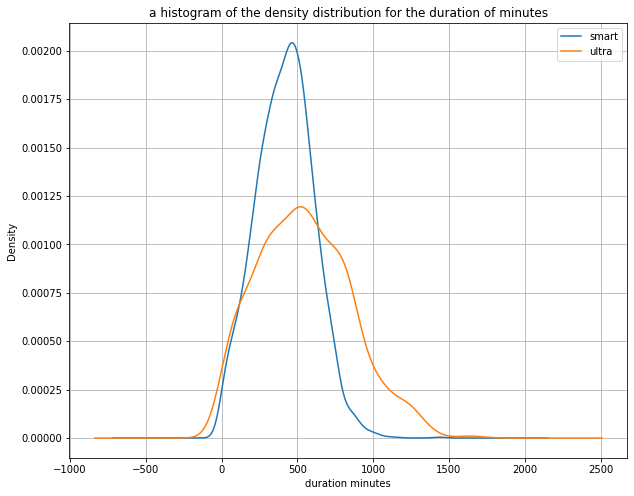

In [52]:
smart_hist = smart_users_stats.plot(
    kind='kde', y='duration_minutes', label='smart'
)
ultra_users_stats.plot(
    kind='kde', y='duration_minutes', ax=smart_hist, 
    legend=True, grid=True, label='ultra', figsize=(10,8)
)
plt.xlabel('duration minutes')
plt.title('a histogram of the density distribution for the duration of minutes')

Гистограммы плотностей для двух тарифов стремятся к нормальному распределению. Но гистограмма плотности распределения для тарифа `smart` лучше отображает нормальное распределение данных, поскольку содержит выборку из 2230 значений, а выборка для тарифа `ultra` - 986 значений. Более чем в два раза больше, а это значит, выборка для тарифа `smart` лучше отображает генеральную совокупность.


У продолжительности звонков для тарифа `ultra` разброс данных шире, чем для тарифа `smart`, что также говорят и значения дисперсии. У обоих гистрограмм есть длинные хвосты, которые сигнализируют о том, что есть сильно продолжительные разговоры, а есть нулевые и стремящиеся к ним.

Чтобы оценить скошенность данных, построю диаграммы размаха и гистограммы частоты для двух тарифов:

<AxesSubplot:>

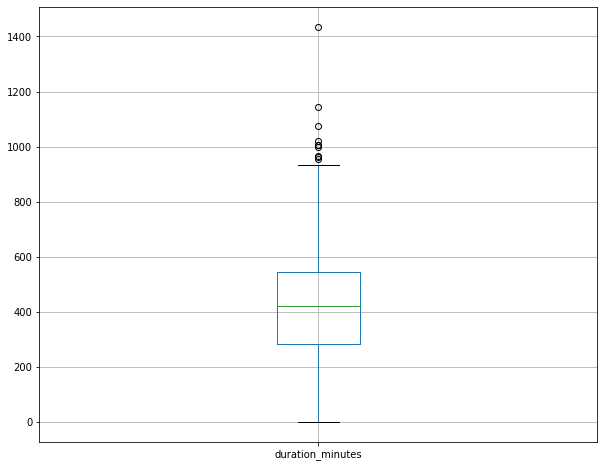

In [53]:
smart_users_stats.boxplot(column='duration_minutes', figsize=(10,8))

In [54]:
smart_users_stats['duration_minutes'].median() # выведу значение медианы

423.0

<AxesSubplot:>

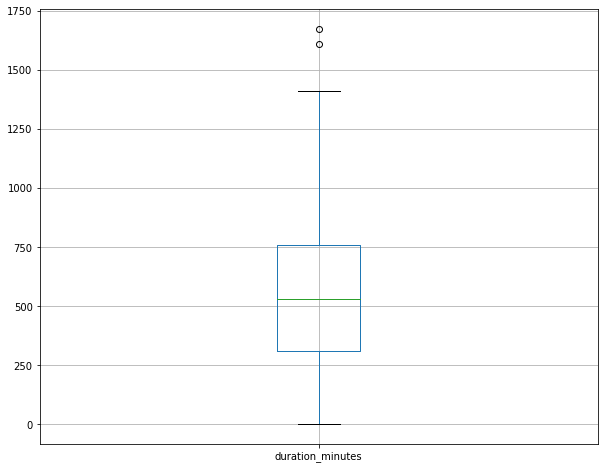

In [55]:
ultra_users_stats.boxplot(column='duration_minutes', figsize=(10,8))

In [56]:
ultra_users_stats['duration_minutes'].median() # выведу значение медианы

528.0

Text(0.5, 1.0, 'frequency histogram for the duration of minutes')

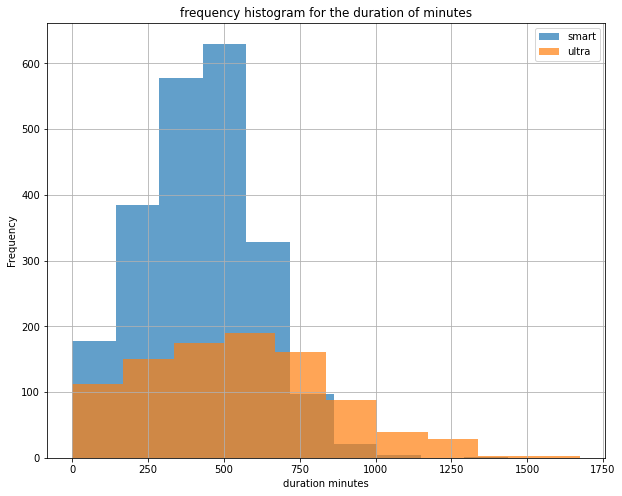

In [57]:
smart_hist = smart_users_stats.plot(
    kind='hist', y='duration_minutes', label='smart', alpha=0.7, figsize=(10,8)
)
ultra_users_stats.plot(
    kind='hist', y='duration_minutes', ax=smart_hist,
    legend=True, grid=True, label='ultra', alpha=0.7
)
plt.xlabel('duration minutes')
plt.title('frequency histogram for the duration of minutes')

По построенным графикам наблюдается:
- набор значений количества минут для тарифа `ultra` имеет положительную скошенность (данные скошены вправо). Также это отражает и значение медианы - 528, которая меньше среднего значения - 545;
- набор данных количества минут для тарифа `smart` в целом не имеет скоса: на диаграмме размаха расстояние между медианой и первым квартилем практически равно расстоянию между медианой и третим квартилем, также об отсутствии скошенности говорят значение медианы - 423 и среднего - 419: разница почти незначительна.

**Анализ статистик для количества сообщений `messages_count`:**

In [58]:
users_stats.groupby('tariff').agg(
    {'messages_count':['median','mean','var','std']}
).style.format("{:.2f}")

Пользователи тарифа `ultra`, в среднем, за месяц отправляют больше сообщений, чем пользователи тарифа `smart`. Разница между значениями среднего небольшая, не смотря на то, что в тариф `ultra` включено 1000 сообщений, пользователи не используют целиком этот пакет, а за абанентскую плату платят почти в 4 раза больше, чем клиенты тарифа `smart` (у них включено 50 сообщений, то есть большинство пользователей укладываются в пакет количества включенных сообщений).

Гистограммы распределения плотности для параметра `messages_count`:

Text(0.5, 1.0, 'histogram of the distribution density for the number of messages')

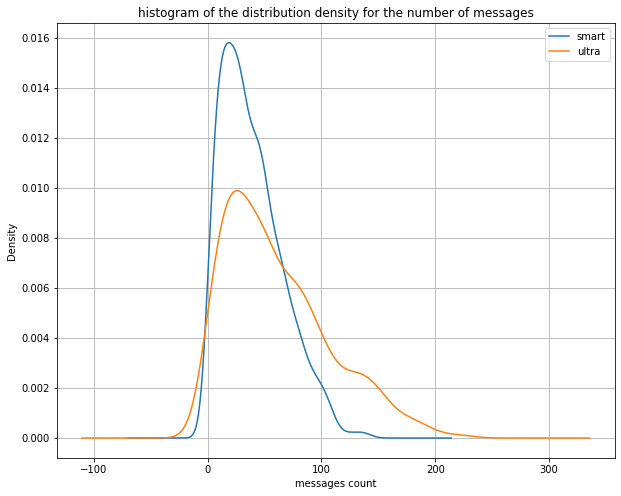

In [59]:
smart_hist = smart_users_stats.plot(
    kind='kde', y='messages_count', label='smart'
)
ultra_users_stats.plot(
    kind='kde', y='messages_count', ax=smart_hist, 
    legend=True, grid=True, label='ultra', figsize=(10,8)
)
plt.xlabel('messages count')
plt.title('histogram of the distribution density for the number of messages')

Гистограммы плотностей количества сообщений для двух тарифов стремятся к нормальному распределению. У количества сообщений для тарифа `ultra` разброс данных шире, чем для тарифа `smart`, что также показывают и значения дисперсии. 
У гистрограммы для тарифа `ultra` есть длинный хвост, который говорит о том, что есть пользователи, которые отправляют большое количество сообщений, а есть те, кто не отправляет их вовсе.

Чтобы оценить скошенность данных, построю диаграммы размаха и гистограммы частоты распределения для двух тарифов:

<AxesSubplot:>

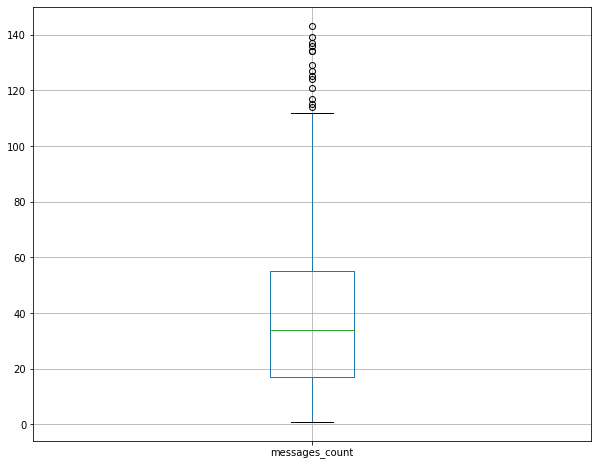

In [60]:
smart_users_stats.boxplot(column='messages_count', figsize=(10,8))

In [61]:
smart_users_stats['messages_count'].median() # выведу значение медианы

34.0

<AxesSubplot:>

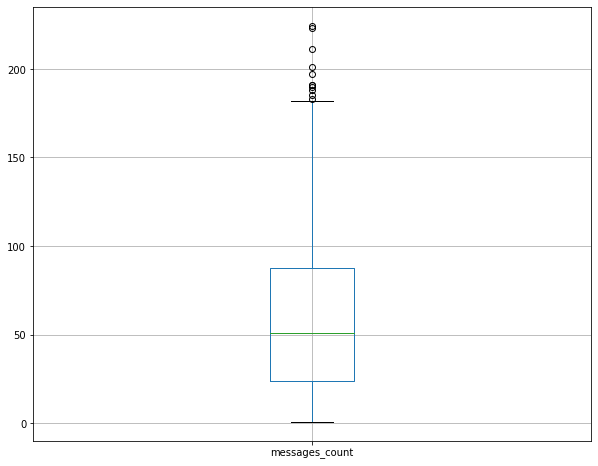

In [62]:
ultra_users_stats.boxplot(column='messages_count', figsize=(10,8))

In [63]:
ultra_users_stats['messages_count'].median() # выведу значение медианы

51.0

Text(0.5, 1.0, 'frequency histogram for the number of messages')

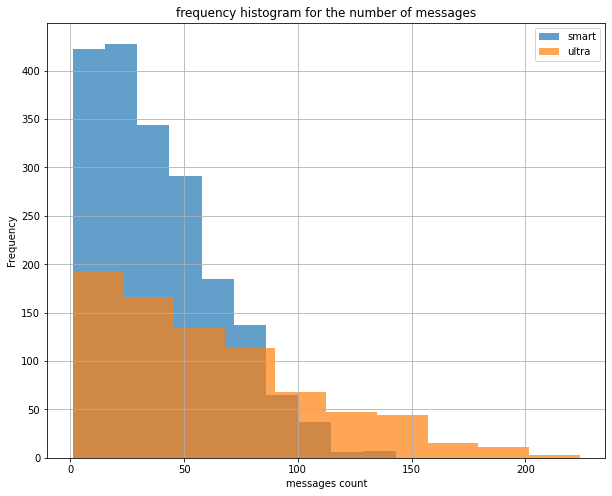

In [64]:
smart_hist = smart_users_stats.plot(
    kind='hist', y='messages_count', label='smart', alpha=0.7, figsize=(10,8)
)
ultra_users_stats.plot(
    kind='hist', y='messages_count', ax=smart_hist,
    legend=True, grid=True, label='ultra', alpha=0.7
)
plt.xlabel('messages count')
plt.title('frequency histogram for the number of messages')

Вывод: оба набора значений количества минут для двух тарифов имеют положительную скошенность. Об этом можно судить и по графикам, и по характеристикам положения: для скошенных наборов данных вправо медиана меньше среднего значения.

**Анализ статистик для объема интернет-трафика `gb_used`:**

In [65]:
users_stats.groupby('tariff').agg(
    {'gb_used':['median','mean','var','std']}
).style.format("{:.2f}")

Пользователи тарифа `ultra` за месяц используют больше объема интернет-трафика, чем пользователи тарифа `smart`. Разница между значениями среднего небольшая, не смотря на то, что в тариф `ultra` включено 30Гб интернет-трафика, пользователи не используют целиком этот пакет, а за абанентскую плату платят почти в 4 раза больше, чем клиенты тарифа `smart`. 

Гистограммы распределения плотности для объема интернет-трафика `gb_used`:

Text(0.5, 1.0, 'density distribution histogram for internet traffic')

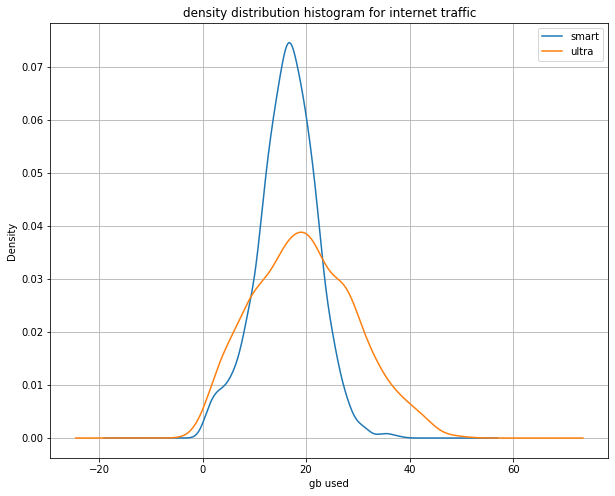

In [66]:
smart_hist = smart_users_stats.plot(
    kind='kde', y='gb_used', label='smart'
)
ultra_users_stats.plot(
    kind='kde', y='gb_used', ax=smart_hist,
    legend=True, grid=True, label='ultra', figsize=(10,8)
)
plt.xlabel('gb used')
plt.title('density distribution histogram for internet traffic')

По построенным гистограммам плотностей израсходованного интернет-трафика для двух тарифов, так же можно сделать вывод, что они стремятся к нормальному распределению. У интернет-трафика для тарифа `ultra` разброс данных шире, чем для тарифа `smart`, что также показывают и значения дисперсии. 

Чтобы оценить скошенность данных, построю диаграммы размаха и гистограммы частоты распределения для двух тарифов:

<AxesSubplot:>

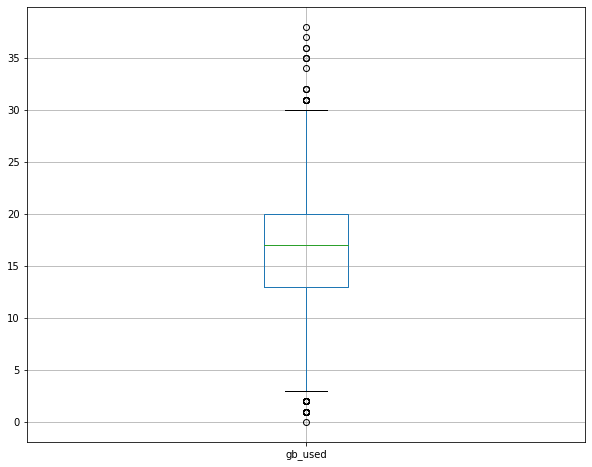

In [67]:
smart_users_stats.boxplot(column='gb_used', figsize=(10,8))

In [68]:
smart_users_stats['gb_used'].median() # выведу значение медианы

17.0

<AxesSubplot:>

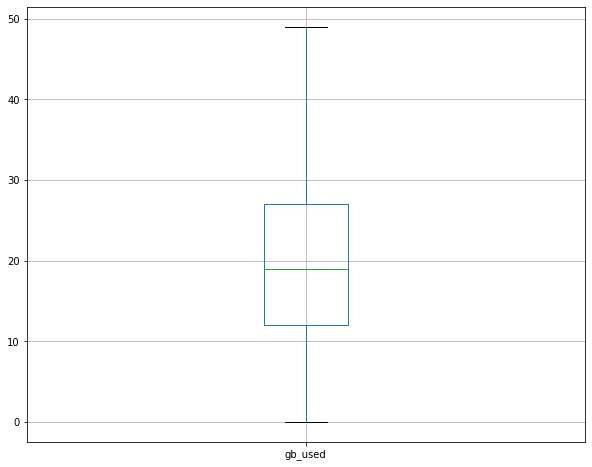

In [69]:
ultra_users_stats.boxplot(column='gb_used', figsize=(10,8))

In [70]:
ultra_users_stats['gb_used'].median() # выведу значение медианы

19.0

Text(0.5, 1.0, 'frequency histogram for internet traffic')

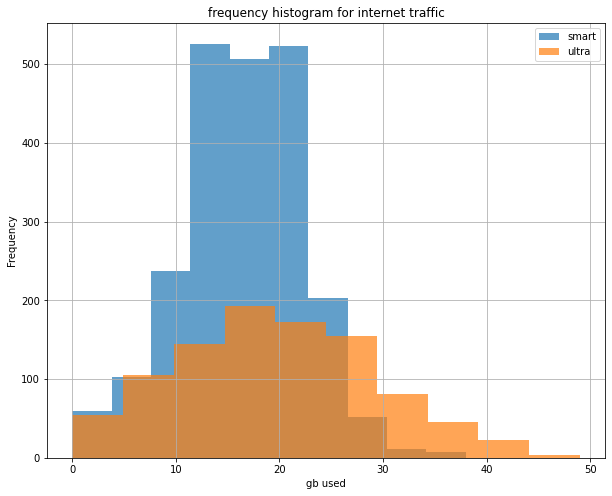

In [71]:
smart_hist = smart_users_stats.plot(
    kind='hist', y='gb_used', label='smart', alpha=0.7, figsize=(10,8)
)
ultra_users_stats.plot(
    kind='hist', y='gb_used', ax=smart_hist,
    legend=True, grid=True, label='ultra', alpha=0.7
)
plt.xlabel('gb used')
plt.title('frequency histogram for internet traffic')

Вывод:
- набор данных количества минут для тарифов `smart` и `ultra` в целом не имеет скоса: на диаграмме размаха расстояние между медианой и первым квартилем практически равно расстоянию между медианой и третим квартилем, также об отсутствии скошенности говорят значения медианы и среднего: разница почти незначительна.

## Проверка гипотез

Буду проверять **первую гипотезу** о равенстве средних двух генеральных совокупностей: **"средняя выручка пользователей тарифов `ultra` и `smart` различаются"**. 

Случайно взятыми выборками из двух ГС служат два датафрейма `smart_users_stats` и `ultra_users_stats`.

Сформулирую две гипотезы:
- нулевая гипотеза Н0: средняя выручка пользователей тарифов `smart` и `ultra` не различаются;
- альтернативная гипотеза Н1: средняя выручка пользователей тарифов `smart` и `ultra` различаются.

Цель состоит в том, чтобы определить, какое утверждение - нулевое или альтернативное - лучше подтверждается данными, полученными из наших выборочных значений.
Для определения статистической значимости используется p-value (или р-уровень значимости).
Если при проверке нулевой гипотезы значение p-value получается меньше порогового (alpha), то вероятность получить такие данные очень низка, значит появляется основание отбросить нулевую гипотезу. Значит, недостаточно данных, чтобы отвергнуть альтернативную гипотезу и принять нулевую. А при p-value больше порогового значения alpha нулевая гипотеза не отвергается.

In [72]:
alpha = 0.05 # задаю пороговое значение alpha

### Проверка данных на нормальность распределения

Чтобы использовать t-критерий Стьюдента для проверки статистических гипотез необходимо убедиться в нормальности распределения данных, а именно проверить гипотезу о нормальности исходных данных. 

На примере данных об использованных гигабайтах с помощью критерия Шапиро-Уилка выполню проверку данных на нормальность распределения:

In [73]:
stat, p_value = st.shapiro(users_stats['gb_used']) # критерий Шапиро-Уилка
print('р-значение:', p_value)

if p_value > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

р-значение: 1.0
Принять гипотезу о нормальности


Проверка выполнена, **данные распределены нормально**, можно использовать t-критерий Стьюдента для проверки статистических гипотез.

In [74]:
def check_p_value(results):
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Применю метод `scipy.stats.ttest_ind` для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. В качестве параметров задаю массивы, содержащие выборки, и параметр `equal_var=False`, который говорит о том, что дисперсии исследуемых выборок не равны.

In [75]:
results_revenue_tariff = st.ttest_ind(
    smart_users_stats['revenue_by_month'], 
    ultra_users_stats['revenue_by_month'],
    equal_var = False
)

In [76]:
check_p_value(results_revenue_tariff)

p-значение:  2.069515201500249e-250
Отвергаем нулевую гипотезу


В результате, значение p-value настолько мало, что нулевая гипотеза отвергается в пользу альтернативной: средняя выручка пользователей тарифов `smart` и `ultra` различаются. 

Так как подтвердилась гипотеза о том, что выручки различаются, но пока не известно, какой тариф приносит больше денежных средств телеком-компании, то посчитаю среднее для двух выборок тарифов `smart` и `ultra`.

In [77]:
round(smart_users_stats['revenue_by_month'].mean())

1290

In [78]:
round(ultra_users_stats['revenue_by_month'].mean())

2070

По полученным данным, делаю **вывод, что клиенты тарифа `ultra` приносят в 1.6 раза больше выручки телеком-компании.**

**Вторая гипотеза** о равенстве средних двух генеральных совокупностей звучит следующим образом: **"средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".**

Для начала создам две переменные `moscow_revenue` и `region_revenue`, в которые сохраню Series со значениями выручки по месяцам для пользователей из Москвы и пользователей из региона соответственно.

In [79]:
moscow_revenue = users_stats.query('city == "Москва"').reset_index(drop=True)['revenue_by_month']
moscow_revenue.head()

0    1150.0
1     550.0
2    1950.0
3    1950.0
4    1950.0
Name: revenue_by_month, dtype: float64

In [80]:
region_revenue = users_stats.query('city != "Москва"').reset_index(drop=True)['revenue_by_month']
region_revenue.head()

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: revenue_by_month, dtype: float64

Здесь случайно взятыми выборками из двух ГС являются две переменные `moscow_revenue` и `region_revenue`.

Сформулирую гипотезы:
- нулевая гипотеза Н0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
- альтернативная гипотеза Н1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [81]:
results_revenie_city = st.ttest_ind(
    moscow_revenue, region_revenue, equal_var = False
)

In [82]:
check_p_value(results_revenie_city)

p-значение:  0.5202672108270561
Не получилось отвергнуть нулевую гипотезу


**Вывод:** при определении статистической значимости значение p-value равняется 0.52, то есть вероятность получить такие результаты (как в определении нулевой гипотезы) составляет 52%. Это значит, что нам не хватает данных, чтобы подтвердить альтернативную гипотезу и отвергнуть нулевую гипотезу, и поэтому принимается нулевая: **средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.**

## Общий вывод

После проведенного анализа выборочных данных генеральной совокупности клиентов телеком-компании я сделала следующие выводы:
- средняя выручка пользователей тарифов `smart` и `ultra` различаются, а именно клиенты тарифа `ultra` приносят больше выручки телеком-компании в 1.6 раза. Платя за абонентскую плату 1950 рублей, большинство клиентов `ultra` не тратят все пакеты услуг (минуты, сообщения и интренет), но при этом приносят стабильный доход. В то время как пользователи тарифа `smart` платят 550 руб, но практически полностью используют включенные пакеты;
- вторая статистически не подтвержденная гипотеза говорит о том, что выручки для клиентов из Москвы и региона не отличаются. Значит на связь люди тратят примерно одинаковый объем средств.